#### Importing all required libraries to read and analyse data from the source 

In [136]:
import pandas as pd
import numpy as np

#### Importing libraries for data visualization 

In [137]:
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading data from the source 

In [138]:
df=pd.read_csv('/home/kumar/Documents/HR /hr_data.csv')

#### Checking the head of data 

In [139]:
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


#### Getting total features into the dataframe

In [140]:

df.shape

(8995, 18)

#### Feature Engineering 

##### finding out the Datastructure 

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
SLNO                           8995 non-null int64
Candidate Ref                  8995 non-null int64
DOJ Extended                   8995 non-null object
Duration to accept offer       8995 non-null int64
Notice period                  8995 non-null int64
Offered band                   8995 non-null object
Pecent hike expected in CTC    8995 non-null float64
Percent hike offered in CTC    8995 non-null float64
Percent difference CTC         8995 non-null float64
Joining Bonus                  8995 non-null object
Candidate relocate actual      8995 non-null object
Gender                         8995 non-null object
Candidate Source               8995 non-null object
Rex in Yrs                     8995 non-null int64
LOB                            8995 non-null object
Location                       8995 non-null object
Age                            8995 non-null int64
Status      

#### Finding the missing values

In [143]:

df.isna().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [144]:
df=df.drop('SLNO',axis=1)

In [145]:
df['DOJ_Ext']=df['DOJ Extended'].map({'No':0,'Yes':1})


In [146]:
df=df.drop('DOJ Extended',axis=1)


In [147]:
df['Status'].value_counts()

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

In [148]:

df['Joining Bonus']=df['Joining Bonus'].map({'No':0,'Yes':1})

'''********** Male as 1 and Female as 0 ********'''

df['Gender_Male']=df['Gender'].map({'Female':0,'Male':1})

'''****** Candidate Not joining as 1 and Joining as 0 ********'''

df['Status_Joined']=df['Status'].map({'Joined':0,'Not Joined':1})
df['Candidate relocate actual']=df['Candidate relocate actual'].map({'No':0,'Yes':1})
df.head()

,Candidate Ref,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status,DOJ_Ext,Gender_Male,Status_Joined
0,2110407,14,30,E2,-20.79,13.16,42.86,0,0,Female,Agency,7,ERS,Noida,34,Joined,1,0,0
1,2112635,18,30,E2,50.00,320.00,180.00,0,0,Male,Employee Referral,8,INFRA,Chennai,34,Joined,0,1,0
2,2112838,3,45,E2,42.84,42.84,0.00,0,0,Male,Agency,4,INFRA,Noida,27,Joined,0,1,0
3,2115021,26,30,E2,42.84,42.84,0.00,0,0,Male,Employee Referral,4,INFRA,Noida,34,Joined,0,1,0
4,2115125,1,120,E2,42.59,42.59,0.00,0,1,Male,Employee Referral,6,INFRA,Noida,34,Joined,1,1,0


In [149]:
df['Candidate relocate actual'].value_counts()

0    7705
1    1290
Name: Candidate relocate actual, dtype: int64

In [150]:
df=df.drop('Status',axis=1)
df=df.drop('Gender',axis=1)
df.head()

,Candidate Ref,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Candidate Source,Rex in Yrs,LOB,Location,Age,DOJ_Ext,Gender_Male,Status_Joined
0,2110407,14,30,E2,-20.79,13.16,42.86,0,0,Agency,7,ERS,Noida,34,1,0,0
1,2112635,18,30,E2,50.00,320.00,180.00,0,0,Employee Referral,8,INFRA,Chennai,34,0,1,0
2,2112838,3,45,E2,42.84,42.84,0.00,0,0,Agency,4,INFRA,Noida,27,0,1,0
3,2115021,26,30,E2,42.84,42.84,0.00,0,0,Employee Referral,4,INFRA,Noida,34,0,1,0
4,2115125,1,120,E2,42.59,42.59,0.00,0,1,Employee Referral,6,INFRA,Noida,34,1,1,0


#### Data Preprocessing  

In [152]:
from sklearn.preprocessing import LabelEncoder

In [153]:
Label=LabelEncoder()

In [154]:
df['Offered band']=Label.fit_transform(df['Offered band'])

In [155]:
df['Offered band'].head()

0    2
1    2
2    2
3    2
4    2
Name: Offered band, dtype: int64

In [156]:
df=df.drop('Location',axis=1)
df=df.drop('LOB',axis=1)

#### Exploratory data analysis

In [157]:
'''Using Pandas Profiling to visualise the data'''
pp.ProfileReport(df)

#### Using heatmap to visualise the correlation between the features 

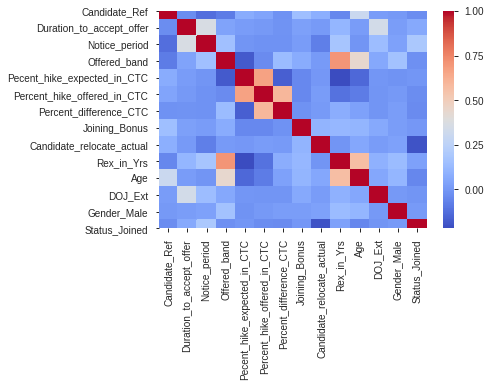

In [158]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [159]:
df.head()

,Candidate_Ref,Duration_to_accept_offer,Notice_period,Offered_band,Pecent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Candidate_Source,Rex_in_Yrs,Age,DOJ_Ext,Gender_Male,Status_Joined
0,2110407,14,30,2,-20.79,13.16,42.86,0,0,Agency,7,34,1,0,0
1,2112635,18,30,2,50.00,320.00,180.00,0,0,Employee Referral,8,34,0,1,0
2,2112838,3,45,2,42.84,42.84,0.00,0,0,Agency,4,27,0,1,0
3,2115021,26,30,2,42.84,42.84,0.00,0,0,Employee Referral,4,34,0,1,0
4,2115125,1,120,2,42.59,42.59,0.00,0,1,Employee Referral,6,34,1,1,0


In [160]:
df['Candidate_Source'].value_counts()

Direct               4801
Agency               2585
Employee Referral    1609
Name: Candidate_Source, dtype: int64

In [161]:
candidate_source=pd.get_dummies(df['Candidate_Source'],drop_first=True)

In [162]:
df=pd.concat([df,candidate_source],axis=1)

In [163]:
df=df.drop('Candidate_Source',axis=1)

In [178]:
df.corr()['Status_Joined'].sort_values()

Candidate_relocate_actual     -0.196234
Employee Referral             -0.080253
Age                           -0.046270
Percent_difference_CTC        -0.033151
Candidate_Ref                 -0.031698
Percent_hike_offered_in_CTC   -0.027514
Direct                        -0.019291
Offered_band                  -0.018254
DOJ_Ext                       -0.006102
Pecent_hike_expected_in_CTC    0.000290
Joining_Bonus                  0.004101
Gender_Male                    0.012851
Rex_in_Yrs                     0.037716
Duration_to_accept_offer       0.065446
Notice_period                  0.192119
Status_Joined                  1.000000
Name: Status_Joined, dtype: float64

#### Selecting x and y variable 

In [166]:

x=df.drop('Status_Joined',axis=1).values
y=df['Status_Joined'].values

#### Spliting x and y into train and test variables

In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

#### Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

#### Using Linear Logistic model to fit x and y train data 

In [168]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0)
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the value

In [169]:
y_pred=LR.predict(x_test)

In [170]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Generating Classification report, Confussion Matrics and Accuracy Score

In [171]:
print('Classification report :')
print('\n')
print(classification_report(y_test,y_pred))
print('\n')
print('Confussion Matrics :')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Accuracy Score :')
print(accuracy_score(y_test,y_pred)*100)

Classification report :


              precision    recall  f1-score   support

           0       0.82      0.99      0.89      2188
           1       0.48      0.06      0.10       511

    accuracy                           0.81      2699
   macro avg       0.65      0.52      0.50      2699
weighted avg       0.75      0.81      0.74      2699



Confussion Matrics :


[[2156   32]
 [ 482   29]]


Accuracy Score :
80.95590959614672


#### Using Cross Validation to find the actual accuracy score

In [172]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LR,x,y,cv=10,scoring='accuracy'))

[0.81333333 0.81333333 0.81333333 0.81222222 0.81222222 0.8131257
 0.8131257  0.8131257  0.8131257  0.8131257 ]


#### Finding out the mean of Accuracy Score

In [173]:
LR_accuracy_score = print(cross_val_score(LR,x,y,cv=10,scoring='accuracy').mean()*100)

81.30072920528984


#### Through this accuracy score we found that on an average the prediction is of 81.30 % chances is that candidate would join the company 